In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="white")

In [4]:
market_df=pd.read_csv("market_fact.csv")
customer_df=pd.read_csv("cust_dimen.csv")
product_df=pd.read_csv("prod_dimen.csv")
shipping_df=pd.read_csv("shipping_dimen.csv")
orders_df=pd.read_csv("orders_dimen.csv")

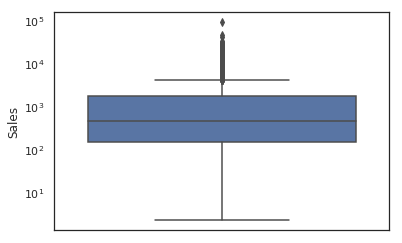

In [5]:
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()

In [6]:
df=pd.merge(market_df,product_df,how='inner',on='Prod_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


In [7]:
df.shape

(8399, 12)

In [9]:
df.sample()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
2810,Ord_3537,Prod_6,SHP_4898,Cust_1268,124.25,0.07,2,-55.78,13.88,0.36,OFFICE SUPPLIES,PAPER


In [8]:
df['Cust_id'].iloc[:8337]

0       Cust_1818
1       Cust_1088
2       Cust_1820
3       Cust_1314
4       Cust_1417
          ...    
8332    Cust_1538
8333    Cust_1432
8334    Cust_1170
8335     Cust_942
8336     Cust_942
Name: Cust_id, Length: 8337, dtype: object

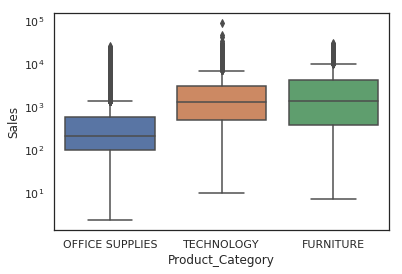

In [9]:
sns.boxplot(x='Product_Category', y='Sales',data=df)
plt.yscale('log')
plt.show()

In [20]:
#office supplies sale are less in comparision to Technology Product_category and furniture


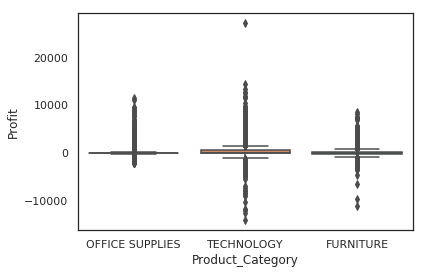

In [11]:
sns.boxplot(x='Product_Category',y='Profit',data=df)
#plt.yscale('log')
plt.show()

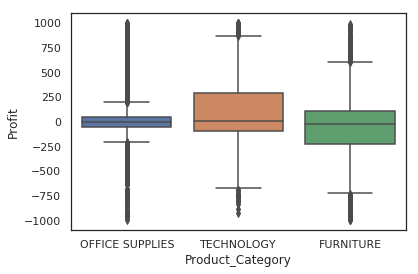

In [12]:
df=df[(df.Profit<1000) & (df.Profit>-1000)]
sns.boxplot(x='Product_Category',y='Profit',data=df)
plt.show()

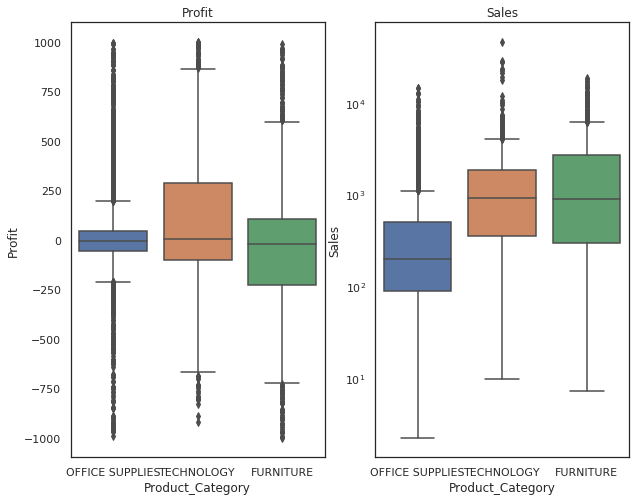

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(x='Product_Category',y='Profit',data=df)
plt.title('Profit')

plt.subplot(1,2,2)
sns.boxplot(x='Product_Category', y='Sales',data=df)
plt.title('Sales')
plt.yscale('log')
plt.show()


In [14]:
df=pd.merge(df,customer_df,how='inner',on='Cust_id')
df.tail()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
7498,Ord_1202,Prod_8,SHP_1659,Cust_461,796.08,0.05,39,30.29,4.00,0.68,TECHNOLOGY,COMPUTER PERIPHERALS,SHIRLEY SCHMIDT,ONTARIO,ONTARIO,CORPORATE
7499,Ord_973,Prod_8,SHP_1343,Cust_357,29.05,0.08,4,-20.90,4.32,0.64,TECHNOLOGY,COMPUTER PERIPHERALS,THEONE PIPPENGER,BRITISH COLUMBIA,WEST,CORPORATE
7500,Ord_1832,Prod_8,SHP_2526,Cust_636,57.03,0.00,7,-31.38,3.52,0.68,TECHNOLOGY,COMPUTER PERIPHERALS,TOM PRESCOTT,NEWFOUNDLAND,ATLANTIC,SMALL BUSINESS
7501,Ord_2010,Prod_8,SHP_2748,Cust_760,282.58,0.10,36,21.68,1.99,0.52,TECHNOLOGY,COMPUTER PERIPHERALS,TRACY PODDAR,NOVA SCOTIA,ATLANTIC,CORPORATE
7502,Ord_1096,Prod_14,SHP_1512,Cust_423,2222.61,0.02,3,196.08,24.49,0.41,TECHNOLOGY,COPIERS AND FAX,LYCORIS SAUNDERS,ONTARIO,ONTARIO,HOME OFFICE


In [15]:
df.shape

(7503, 16)

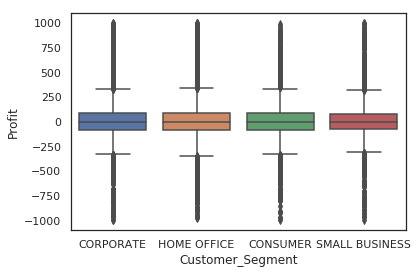

In [16]:
sns.boxplot(x='Customer_Segment',y='Profit',data=df)
#plt.yscale('log')
plt.show()

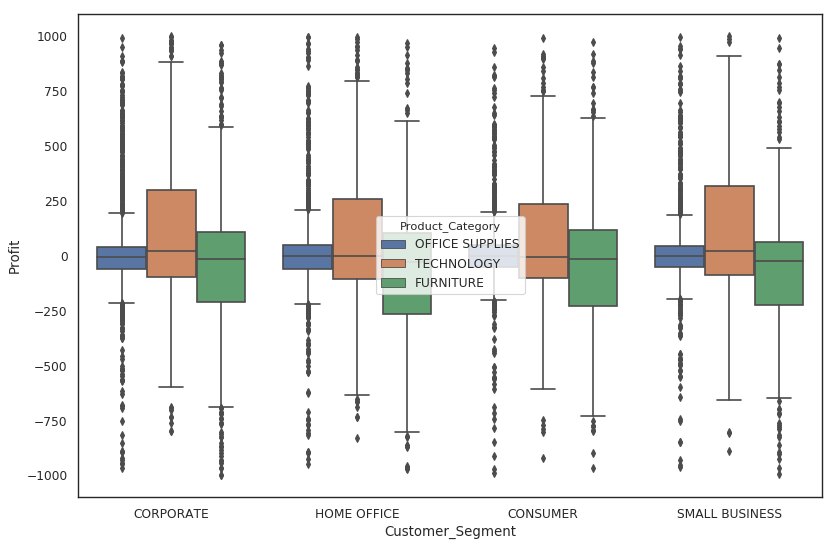

In [17]:
plt.figure(num=None,figsize=(12,8),dpi=80,facecolor='w')
sns.boxplot(x='Customer_Segment',y='Profit',data=df,hue='Product_Category')
plt.show()

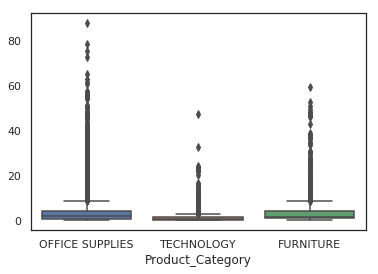

In [19]:
sns.boxplot(x=df['Product_Category'],y=100*df['Shipping_Cost']/df['Sales'])
plt.show()